In [5]:
!pip install geopandas

  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached Fiona-1.9.4.post1-cp39-cp39-win_amd64.whl (22.7 MB)
  Using cached pyproj-3.6.0-cp39-cp39-win_amd64.whl (5.8 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [384]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [385]:
data = gpd.read_file("./2019_turisme_allotjament.gpkg")

In [386]:
df1 = "./2019_turisme_allotjament.gpkg"
df2 = "./2019_turisme_intensitat.gpkg"
pI = "./opendatabcn_pics-csv.csv"

In [387]:
bcn = "./shapefile_distrito_barcelona.gpkg"

In [388]:
bcn_map = gpd.read_file(bcn)

In [389]:
data1 = gpd.read_file(df1)
data2 = gpd.read_file(df2)
pInt = pd.read_csv(pI)

In [390]:
data1.head()

,DN,geometry
0,11,"POLYGON ((431188.914 4584932.450, 431188.914 4..."
1,11,"POLYGON ((431168.914 4584912.450, 431168.914 4..."
2,11,"POLYGON ((431148.914 4584902.450, 431148.914 4..."
3,12,"POLYGON ((431178.914 4584912.450, 431178.914 4..."
4,12,"POLYGON ((431158.914 4584892.450, 431158.914 4..."


<AxesSubplot:>

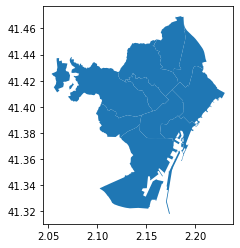

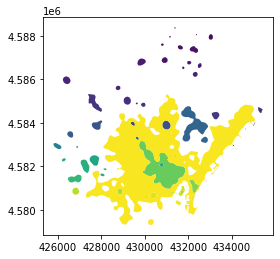

In [326]:
bcn_map.plot()
data2.plot(cmap="viridis")

In [364]:
data1.head()

,DN,geometry
0,11,"POLYGON ((431188.914 4584932.450, 431188.914 4..."
1,11,"POLYGON ((431168.914 4584912.450, 431168.914 4..."
2,11,"POLYGON ((431148.914 4584902.450, 431148.914 4..."
3,12,"POLYGON ((431178.914 4584912.450, 431178.914 4..."
4,12,"POLYGON ((431158.914 4584892.450, 431158.914 4..."


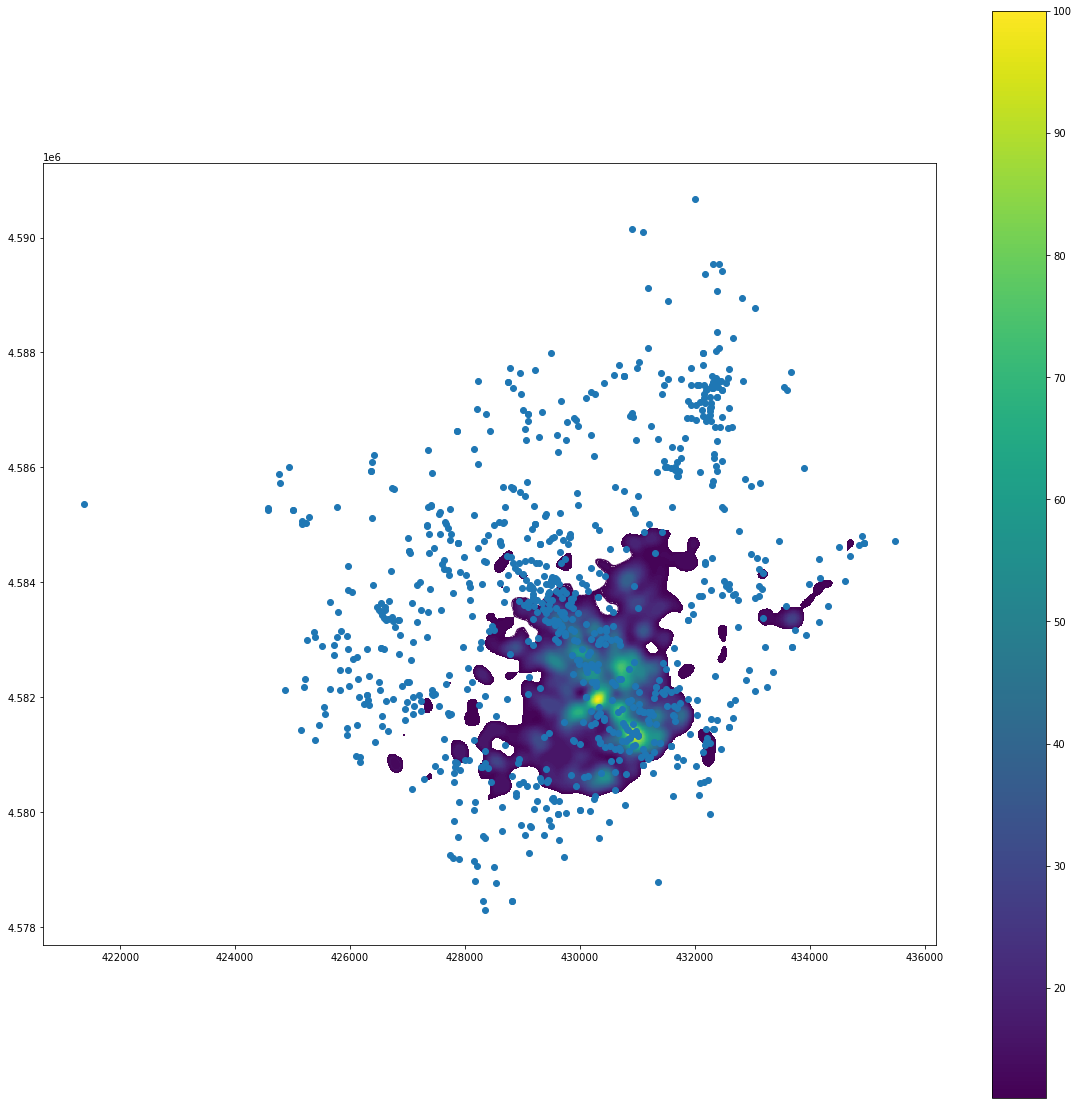

In [328]:
data1.plot(column="DN",legend=True, cmap="viridis",figsize=(20,20))
plt.plot(pInt.geo_epgs_25831_x.values, pInt.geo_epgs_25831_y.values, "o")
plt.show()

In [329]:
data1.head()

,DN,geometry
0,11,"POLYGON ((431188.914 4584932.450, 431188.914 4..."
1,11,"POLYGON ((431168.914 4584912.450, 431168.914 4..."
2,11,"POLYGON ((431148.914 4584902.450, 431148.914 4..."
3,12,"POLYGON ((431178.914 4584912.450, 431178.914 4..."
4,12,"POLYGON ((431158.914 4584892.450, 431158.914 4..."


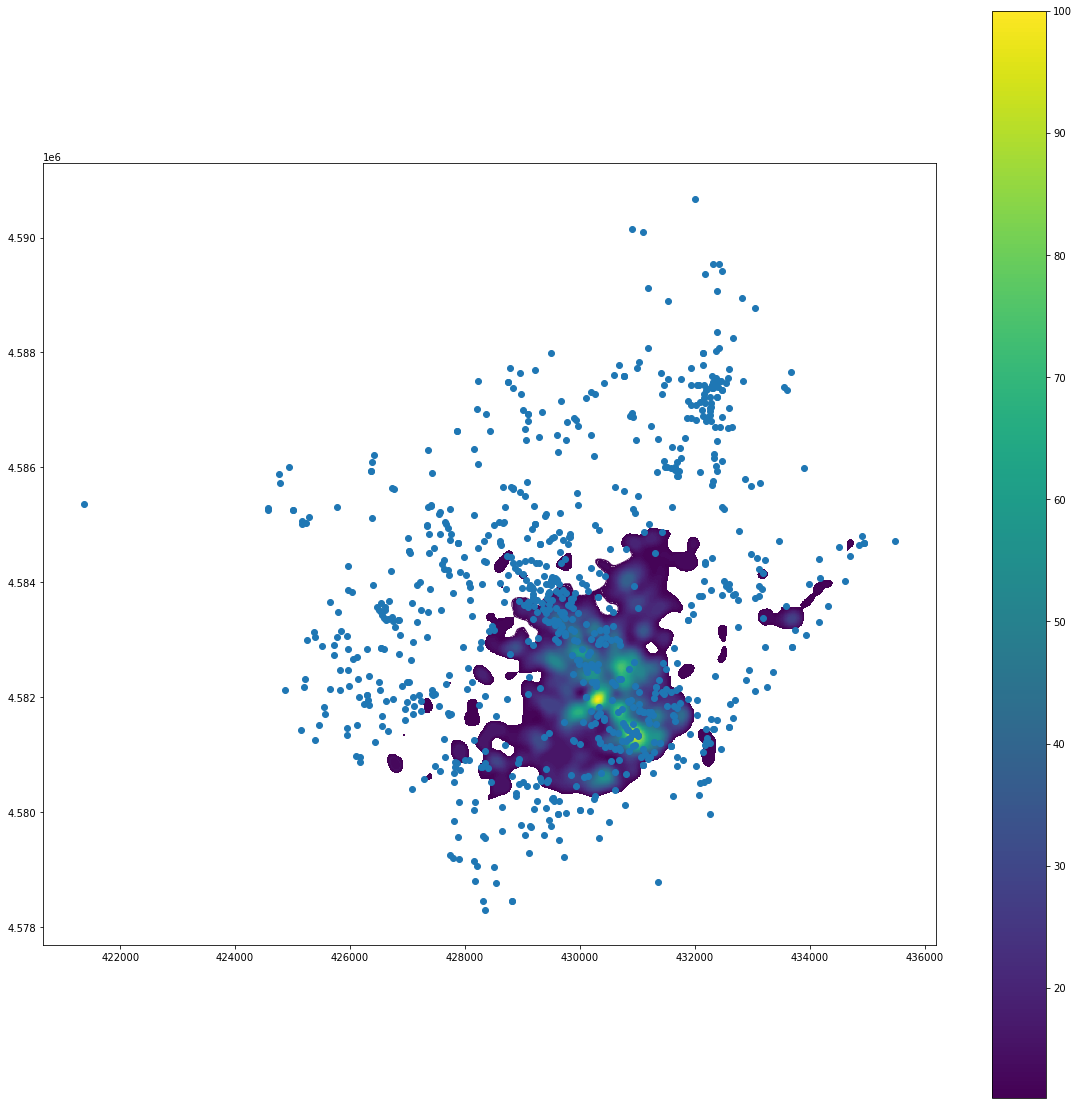

In [330]:
data1.plot(column="DN",legend=True, cmap="viridis",figsize=(20,20))
plt.plot(pInt.geo_epgs_25831_x.values, pInt.geo_epgs_25831_y.values, "o")
plt.show()

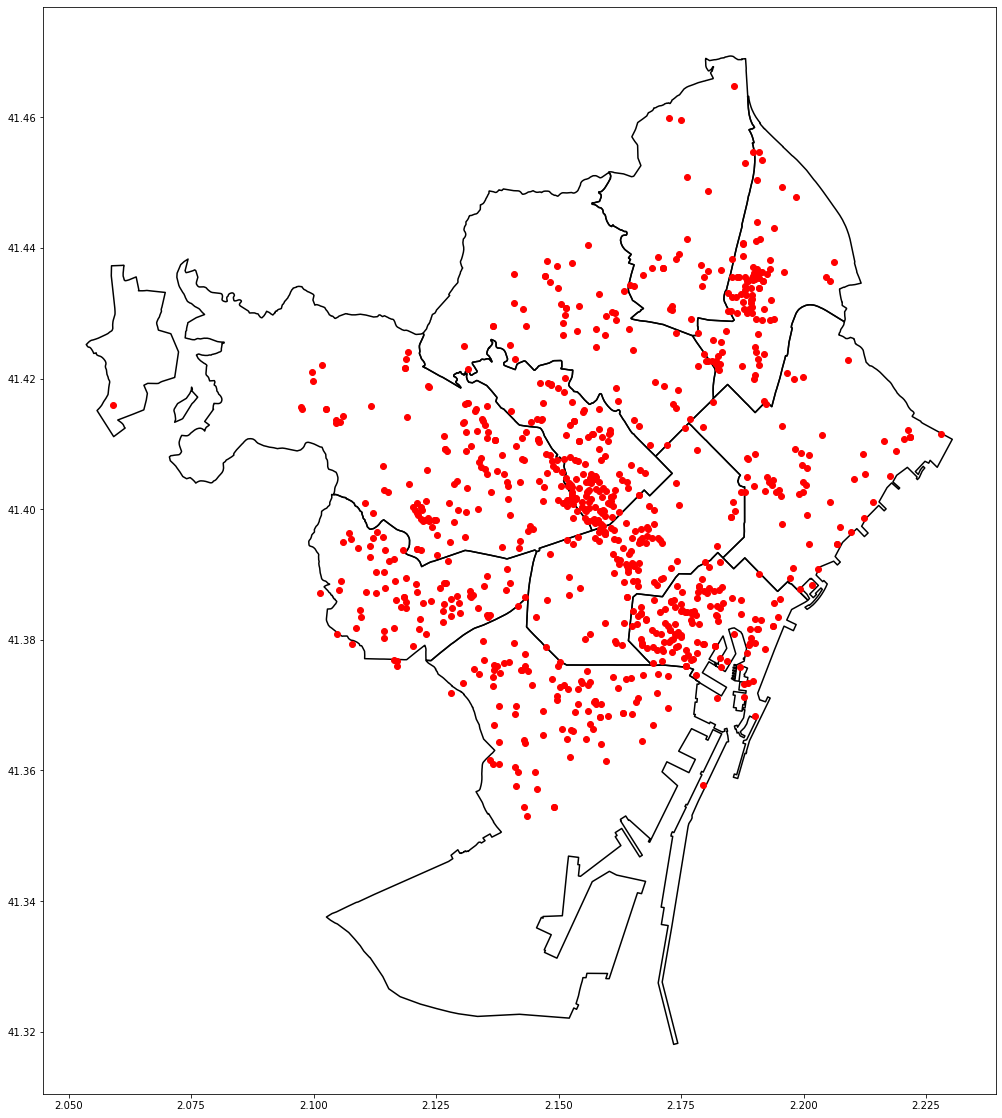

In [331]:
bcn_map.boundary.plot(figsize=(20,20), edgecolor="black")
plt.plot(pInt.geo_epgs_4326_y.values, pInt.geo_epgs_4326_x.values, "ro")
plt.show()

In [391]:
puntos_df = pInt[['geo_epgs_25831_x','geo_epgs_25831_y']]
puntos_df_4326 = pInt[['geo_epgs_4326_y','geo_epgs_4326_x']]
# newPInt = gpd.sjoin(aux1, data1.DN, how="left", op="within")

In [392]:
puntos_df["geometry"] = puntos_df.apply(lambda row: Point(row["geo_epgs_25831_x"], row["geo_epgs_25831_y"]), axis=1)
puntos_gdf = gpd.GeoDataFrame(puntos_df, geometry="geometry")

C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\558988450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntos_df["geometry"] = puntos_df.apply(lambda row: Point(row["geo_epgs_25831_x"], row["geo_epgs_25831_y"]), axis=1)


In [393]:
puntos_con_densidad = gpd.sjoin(puntos_gdf, data1, how="left", op="within")

C:\Users\jairo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\2166613603.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:25831

  puntos_con_densidad = gpd.sjoin(puntos_gdf, data1, how="left", op="within")


In [394]:
puntos_con_densidad["DN"] = puntos_con_densidad.DN.fillna(0)


In [395]:
pInt["DN"] = puntos_con_densidad.DN
pInt.DN

0       0.0
1      27.0
2       0.0
3       0.0
4       0.0
       ... 
866     0.0
867    21.0
868     0.0
869    16.0
870     0.0
Name: DN, Length: 871, dtype: float64

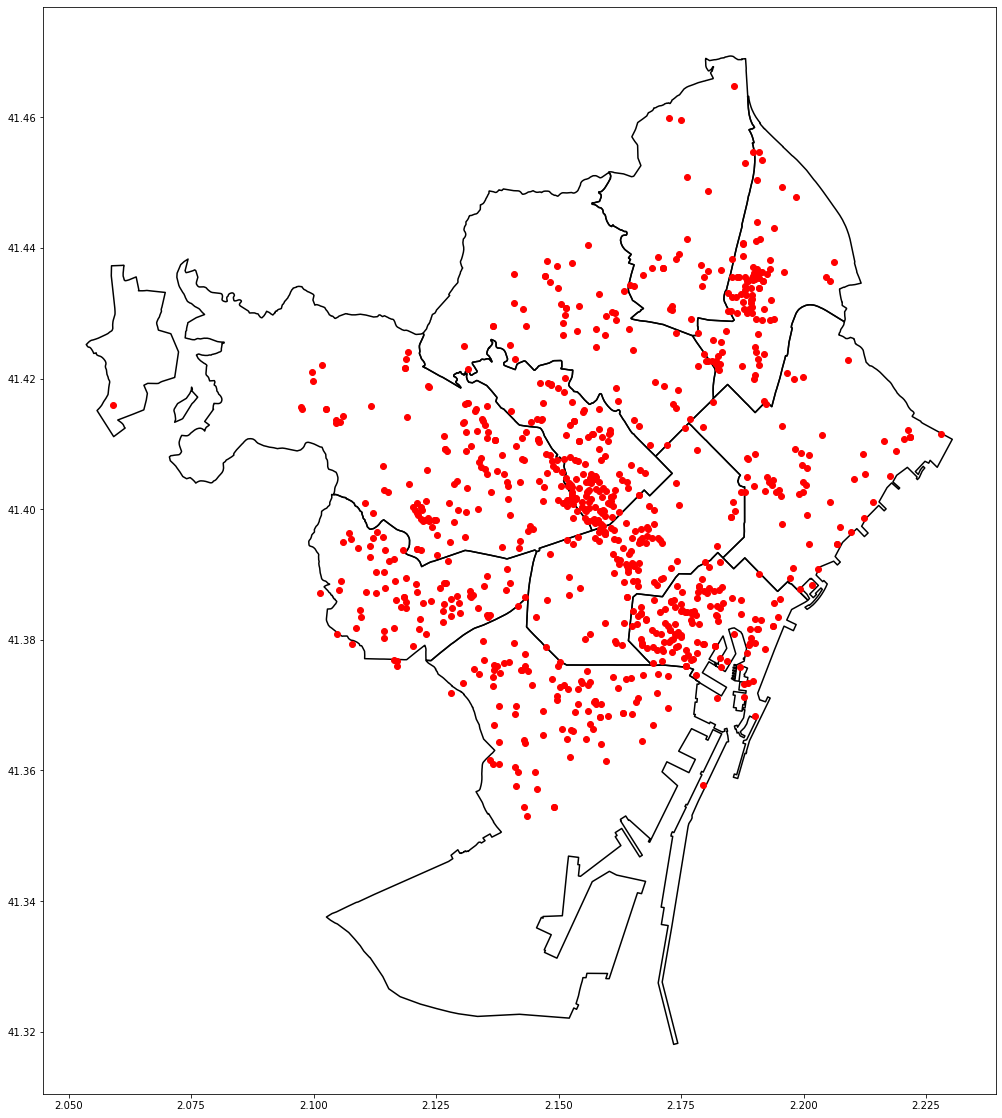

In [396]:
bcn_map.boundary.plot(figsize=(20,20), edgecolor="black")
plt.plot(pInt.geo_epgs_4326_y.values, pInt.geo_epgs_4326_x.values, "ro")
plt.show()

In [397]:
puntos_df_4326["geometry"] = puntos_df_4326.apply(lambda row: Point(row["geo_epgs_4326_y"], row["geo_epgs_4326_x"]), axis=1)
puntos_gdf_4326 = gpd.GeoDataFrame(puntos_df_4326, geometry="geometry")

C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\1654701402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntos_df_4326["geometry"] = puntos_df_4326.apply(lambda row: Point(row["geo_epgs_4326_y"], row["geo_epgs_4326_x"]), axis=1)


In [398]:
puntos_gdf_4326["DN"] = puntos_con_densidad.DN

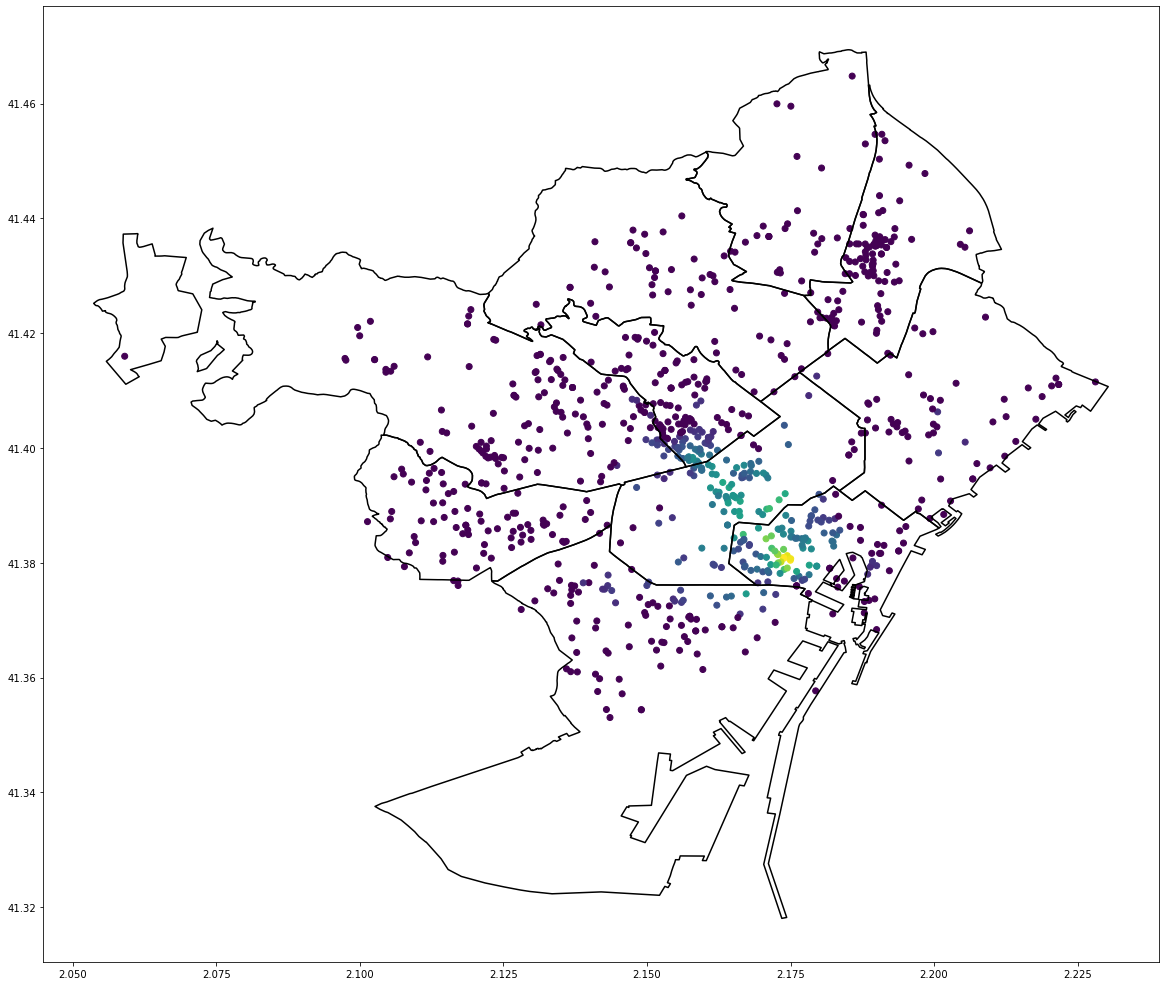

In [399]:
fig, ax = plt.subplots(figsize=(20, 20))
bcn_map.boundary.plot(ax=ax, edgecolor="black")
puntos_gdf_4326.plot(ax=ax, column="DN", cmap="viridis")
plt.show()

In [400]:
puntos_gdf_4326.describe()

,geo_epgs_4326_y,geo_epgs_4326_x,DN
count,871.000000,871.000000,871.000000
mean,2.160038,41.400673,9.223881
std,0.025457,0.020820,17.437420
min,2.059007,41.353039,0.000000
25%,2.142982,41.384512,0.000000
50%,2.160232,41.399665,0.000000
75%,2.179566,41.413605,13.000000
max,2.228124,41.464787,92.000000


,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_category,values_attribute_name,values_value,values_outstanding,values_description,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,DN
0,﻿93334081340,Hotel d'Entitats de Can Guardiola,NaN,NaN,1993-11-30T00:00:00+01:00,2023-02-01T15:33:20.977138+01:00,NaN,NaN,95109,Cuba,...,Informació d'interès,E-mail,obs-satandreu.benestar@gencat.net,True,NaN,432201.211020,4.586806e+06,41.429959,2.188553,0.0
1,﻿92086038702,Bar Marsella,NaN,NaN,1992-03-13T00:00:00+01:00,2022-09-17T04:48:47.605726+02:00,NaN,NaN,308505,C Sant Pau,...,Telèfons,Tel.,934427263,True,NaN,430698.350786,4.581082e+06,41.378278,2.171224,27.0
2,﻿99400204922,Telefèric de Barcelona,NaN,NaN,2008-04-22T14:37:02+02:00,2021-04-22T14:26:50.786623+02:00,NaN,NaN,224904,Pg Joan Borbó C Barcelona,...,Informació d'interès,Web,http://www.telefericodebarcelona.com/ca/,True,NaN,432085.569413,4.580511e+06,41.373250,2.187876,0.0
3,﻿92168177308,Universitat Politècnica de Catalunya,NaN,NaN,1985-12-17T00:00:00+01:00,2023-02-01T17:02:45.969422+01:00,NaN,NaN,169023,C Jordi Girona,...,Informació d'interès,E-mail,informacio-upc@upc.es,True,NaN,426137.592862,4.582311e+06,41.388942,2.116538,0.0
4,﻿99400245589,Casa del Guarda - Espai d'Interpretació del P...,9.208603e+10,Consorci del Parc Natural de la Serra de Colls...,2010-04-20T13:55:00+02:00,2022-08-05T11:07:59.496877+02:00,NaN,NaN,243807,Camí del Pantà,...,Informació d'interès,E-mail,ci@parccollserola.net,True,NaN,424567.087459,4.585287e+06,41.415598,2.097385,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,﻿92086009459,Mercat Sarrià,NaN,NaN,1984-12-28T00:00:00+01:00,2023-06-15T11:10:08.375814+02:00,NaN,NaN,278007,Pg Reina Elisenda Montcada,...,Informació d'interès,Instagram,https://www.instagram.com/mercat_de_sarria/,False,NaN,426499.788078,4.583517e+06,41.399836,2.120723,0.0
867,﻿92086009448,Mercat Santa Caterina,NaN,NaN,1984-12-28T00:00:00+01:00,2023-06-15T11:09:58.922902+02:00,NaN,NaN,132952,Av Francesc Cambó,...,Informació d'interès,Facebook,https://www.facebook.com/MercatSantaCaterinaBcn/,False,NaN,431288.347866,4.581978e+06,41.386395,2.178177,21.0
868,﻿92086009455,Mercat Sants,NaN,NaN,1984-12-28T00:00:00+01:00,2023-06-15T11:10:03.721978+02:00,NaN,NaN,304209,C Sant Jordi,...,Informació d'interès,Facebook,https://www.facebook.com/mercatdesants,False,NaN,427561.269367,4.580720e+06,41.374741,2.133755,0.0
869,﻿92086009454,Mercat Hostafrancs,NaN,NaN,1984-12-28T00:00:00+01:00,2023-06-15T11:07:58.387785+02:00,NaN,NaN,94809,Carrer de la Creu Coberta,...,Informació d'interès,Facebook,https://www.facebook.com/MercatDHostafrancs,False,NaN,428406.282141,4.580759e+06,41.375162,2.143854,16.0


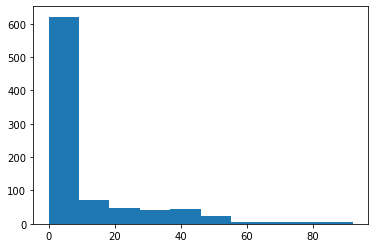

In [401]:
plt.hist(puntos_gdf_4326.DN)
pInt

In [402]:
pInt.DN[pInt.DN < 11] = 1
pInt.DN[(pInt.DN >= 11) & (pInt.DN < 30)] = 2
pInt.DN[(pInt.DN >= 30) & (pInt.DN < 50)] = 3
pInt.DN[(pInt.DN >= 50) & (pInt.DN < 70)] = 4
pInt.DN[pInt.DN >= 70] = 5

C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\25588447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pInt.DN[pInt.DN < 11] = 1
C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\25588447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pInt.DN[(pInt.DN >= 11) & (pInt.DN < 30)] = 2
C:\Users\jairo\AppData\Local\Temp\ipykernel_4708\25588447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pInt.DN[(pInt.DN >= 30) & (pInt.DN < 

In [403]:
pInt.DN.value_counts()

1.0    621
2.0    131
3.0     86
4.0     20
5.0     13
Name: DN, dtype: int64

(array([621.,   0., 131.,   0.,   0.,  86.,   0.,  20.,   0.,  13.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

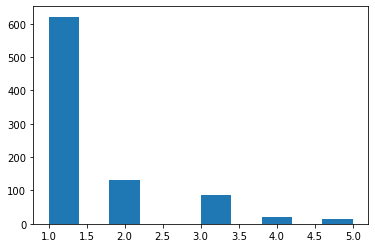

In [413]:
plt.hist(pInt.DN)

In [407]:
# pInt.to_csv("./opendatabcn_pics-csv_with_DN.csv")

In [409]:
pInt[pInt.DN >3]

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_category,values_attribute_name,values_value,values_outstanding,values_description,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,DN
60,﻿92086008773,Palau de la Virreina,NaN,NaN,1984-12-07T00:00:00+01:00,2023-02-16T13:03:28.714172+01:00,NaN,NaN,34308,la Rambla,...,Informació d'interès,E-mail,lavirreinaci@bcn.cat,True,NaN,430744.905236,4.581554e+06,41.382530,2.171726,4.0
88,﻿92086000795,Reial Acadèmia de Ciències i Arts de Barcelona,NaN,NaN,1987-05-14T00:00:00+02:00,2023-03-09T15:22:46.364960+01:00,NaN,NaN,34308,C la Rambla,...,Informació d'interès,E-mail,secretaria@racab.com,True,NaN,430664.248982,4.581737e+06,41.384176,2.170741,5.0
115,﻿99400391163,Can Culleretes,NaN,NaN,2015-07-08T17:06:52+02:00,2021-09-09T02:15:29.757156+02:00,NaN,NaN,272703,C Quintana,...,NaN,NaN,NaN,NaN,NaN,430969.540082,4.581409e+06,41.381241,2.174429,5.0
121,﻿99400407360,La Plaça Reial,NaN,NaN,2015-12-01T10:14:26+01:00,2022-09-24T10:37:07.706053+02:00,NaN,NaN,276001,Pl Reial,...,Informació d'interès,Web,http://www.barcelonaturisme.com/wv3/ca/page/12...,True,NaN,431014.405664,4.581319e+06,41.380441,2.174976,5.0
138,﻿75990368025,Cafeteria Restaurant Cafè de l'Òpera,NaN,NaN,1996-09-18T00:00:00+02:00,2021-07-23T14:05:54.437696+02:00,NaN,NaN,34308,Carrer la Rambla,...,Informació d'interès,Web,http://cafeoperabcn.com,True,NaN,430915.084619,4.581373e+06,41.380913,2.173782,5.0
152,﻿99400390937,Casa Malagrida,NaN,NaN,2015-07-07T11:32:43+02:00,2022-09-17T08:22:05.452719+02:00,NaN,NaN,148307,Pg Gràcia,...,Variables,Arquitecte(s),Joaquim Codina i Matalí,False,NaN,430294.322428,4.582466e+06,41.390708,2.166233,4.0
219,﻿99400390924,Casa Llorenç Camprubí,NaN,NaN,2015-07-07T11:07:02+02:00,2022-09-17T08:22:00.607496+02:00,NaN,NaN,71600,C Casp,...,Variables,Any construcció,1900,False,NaN,430679.343717,4.582312e+06,41.389349,2.170856,4.0
278,﻿99400391164,Camisseria Bonet,NaN,NaN,2015-07-08T17:55:01+02:00,2021-09-09T02:15:32.731245+02:00,NaN,NaN,34308,C Rambla,...,NaN,NaN,NaN,NaN,NaN,430923.429540,4.581360e+06,41.380800,2.173883,5.0
279,﻿99400391167,Casa Doctor Genové,NaN,NaN,2015-07-08T18:14:09+02:00,2022-09-17T08:22:38.123154+02:00,NaN,NaN,34308,C Rambla,...,NaN,NaN,NaN,NaN,NaN,430835.463381,4.581430e+06,41.381425,2.172823,5.0
321,﻿99400476696,El Vapor - Fàbrica Bonaplata,NaN,NaN,2017-01-26T14:18:31+01:00,2021-09-09T02:15:43.219517+02:00,NaN,NaN,329800,C Tallers,...,NaN,NaN,NaN,NaN,NaN,430332.476189,4.581826e+06,41.384946,2.166763,4.0


In [ ]:
locales_data = pInt.groupby(["Nom_barri", "Desc_us_desti_principal"]).size().unstack()